In [0]:
%matplotlib inline
"""
图像打开
平滑，钝化，锐化，裁剪，对比对提升
颜色分离
"""



import cv2
cv2.__version__

'4.1.2'

'4.1.2'

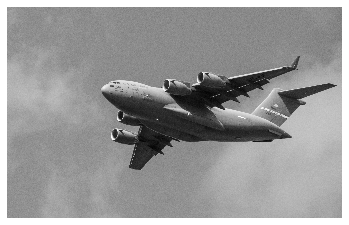

In [2]:
image=cv2.imread("skitlearn/PRECESSING/ImageData/plane.jpg",cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt

plt.imshow(image,cmap="gray")
plt.axis("off")
plt.show()

In [3]:
import numpy as np
image=np.array(image)
image.shape

(2270, 3600)

In [4]:
image.ndim

2

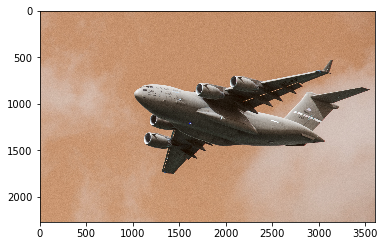

In [5]:
image_bgr=cv2.imread("skitlearn/PRECESSING/ImageData/plane.jpg",cv2.IMREAD_COLOR)#BGR 
plt.imshow(image_bgr)
plt.show()

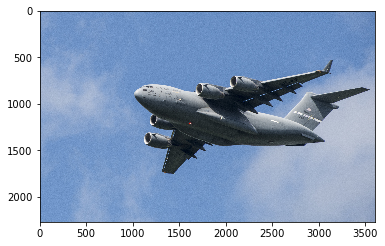

In [6]:
image_bgr=cv2.imread("skitlearn/PRECESSING/ImageData/plane.jpg",cv2.IMREAD_COLOR)
image_rgb=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

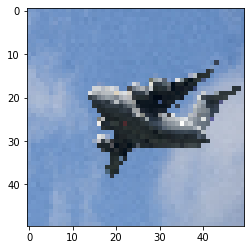

In [7]:
image_50x50=cv2.resize(image_rgb,(50,50))
plt.imshow(image_50x50)
plt.show()

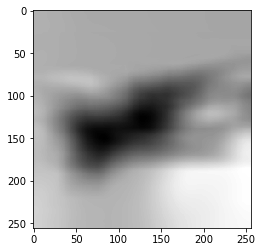

In [8]:
image=cv2.imread("skitlearn/PRECESSING/ImageData/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)
image_blurry=cv2.blur(image,(50,50))
plt.imshow(image_blurry,cmap='gray')
plt.show()

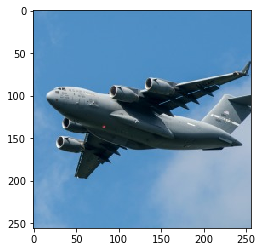

In [9]:
image_rgb=cv2.imread("skitlearn/PRECESSING/ImageData/plane_256x256.jpg",cv2.IMREAD_COLOR)
image_rgb=cv2.cvtColor(image_rgb,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

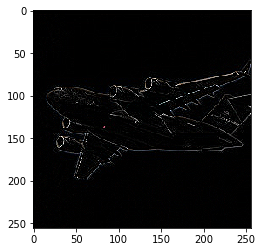

In [10]:
kernel=[
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
]
kernel=np.array(kernel)
image_sharp=cv2.filter2D(image_rgb,-1,kernel)
plt.imshow(image_sharp)
plt.show()


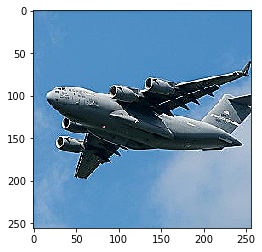

In [11]:
kernel=[
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
]
kernel=np.array(kernel)
image_sharp=cv2.filter2D(image_rgb,-1,kernel)
plt.imshow(image_sharp)
plt.show()

In [12]:
image_gray=cv2.imread("skitlearn/PRECESSING/ImageData/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)

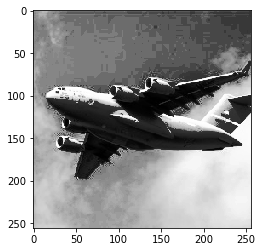

In [13]:
image_enhance=cv2.equalizeHist(image_gray)
plt.imshow(image_enhance,cmap='gray')
plt.show()

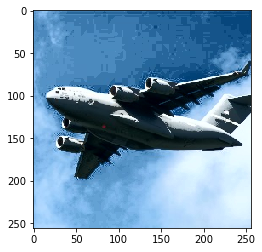

In [14]:
image_yuv=cv2.cvtColor(image_rgb,cv2.COLOR_RGB2YUV)
image_yuv[:,:,0]=cv2.equalizeHist(image_yuv[:,:,0])
image_enhance_rgb=cv2.cvtColor(image_yuv,cv2.COLOR_YUV2RGB)
plt.imshow(image_enhance_rgb)
plt.show()

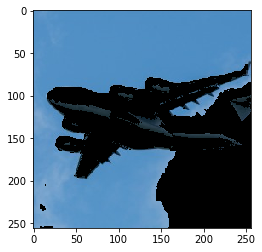

In [15]:
image_bgr=cv2.imread("skitlearn/PRECESSING/ImageData/plane_256x256.jpg",cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)  #色调饱和度亮度
lower_blue = np.array([50, 100, 50])
upper_blue=np.array([130,255,255])
mask=cv2.inRange(img_hsv,lower_blue,upper_blue)

image_masked=cv2.bitwise_and(image_bgr,image_bgr,mask=mask)
image_masked=cv2.cvtColor(image_masked,cv2.COLOR_BGR2RGB)
plt.imshow(image_masked)
plt.show()

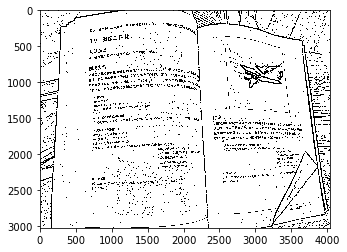

True

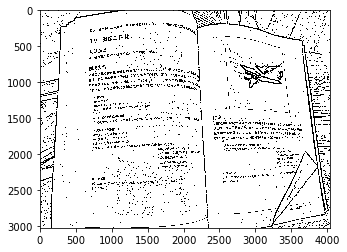

In [16]:
max_output_value = 255
mytest=cv2.imread("skitlearn/PRECESSING/ImageData/mytest.png",cv2.IMREAD_GRAYSCALE)
neighbour_size = 35
subtract_from_mean = 5
image_binary=cv2.adaptiveThreshold(
    mytest,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,neighbour_size,subtract_from_mean
)
plt.imshow(image_binary,cmap='gray')
plt.show(image_binary.all())
cv2.imwrite("skitlearn/PRECESSING/ImageData/testresult.jpeg",image_binary)


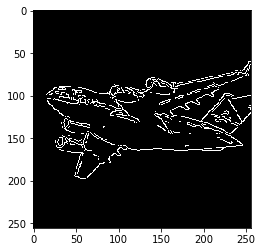

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
median_intensity=np.median(image_gray)
lower_thresh=int(max(0,(1-0.33)*median_intensity))
upper_thresh=int(min(255,(1+0.33)*median_intensity))
image_canny=cv2.Canny(image_gray,lower_thresh,upper_thresh)
plt.imshow(image_canny,cmap='gray')
plt.show()
print(image_canny)

In [20]:
image_gray.shape

(256, 256)

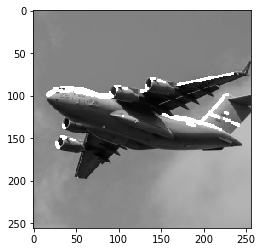

In [39]:
image_rgb=cv2.imread("skitlearn/PRECESSING/ImageData/plane_256x256.jpg",cv2.IMREAD_COLOR)
image_rgb=cv2.cvtColor(image_rgb,cv2.COLOR_BGR2RGB)
image_gray_float=np.float32(image_gray)
block_size=2
aperture=29
free_parameter=0.04
detector_responses=cv2.cornerHarris(image_gray_float,block_size,aperture,free_parameter)
detector_responses=cv2.dilate(image_gray_float,None)
threshold=0.8
image_rgb[detector_responses>threshold*detector_responses.max()]=[255,255,255]
image_gray2=cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray2,cmap='gray')
plt.show()
